In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/flight_data1.csv')
df = df[['DEPARTING_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'DEP_DEL15']]
df = df.dropna()
df = df[(df['PRCP'] > 0) | (df['SNOW'] > 0) | (df['SNWD'] > 0)]

Mounted at /content/drive


In [43]:
print(df.describe())

                PRCP           SNOW           SNWD           TMAX  \
count  137405.000000  137405.000000  137405.000000  137405.000000   
mean        0.338507       0.731641       2.567867      35.933066   
std         0.572332       1.393558       3.115642      14.242365   
min         0.000000       0.000000       0.000000     -10.000000   
25%         0.000000       0.000000       0.000000      28.000000   
50%         0.060000       0.000000       1.200000      34.000000   
75%         0.350000       1.000000       3.900000      42.000000   
max         5.080000      17.200000      25.200000      81.000000   

                AWND      DEP_DEL15  
count  137405.000000  137405.000000  
mean        9.849338       0.281198  
std         4.173042       0.449585  
min         0.890000       0.000000  
25%         6.930000       0.000000  
50%         9.620000       0.000000  
75%        12.530000       1.000000  
max        27.070000       1.000000  


Accuracy: 0.7650984436305015
Precision: 0.5419426048565121
Recall: 0.024682048961946413
F1 Score: 0.04721380835617098


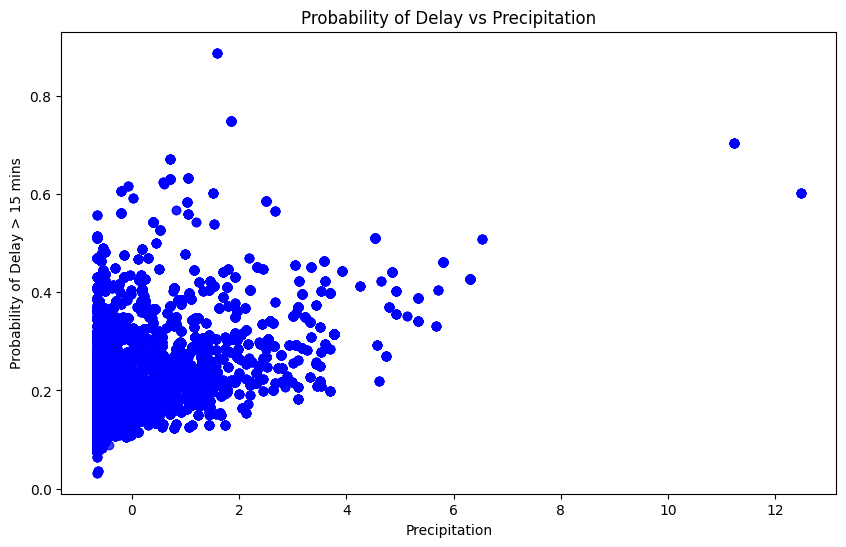

In [54]:
df = pd.read_csv('/content/drive/My Drive/flight_data1.csv')
df = df[['DEPARTING_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'DEP_DEL15']]
df = df.dropna()
df = df[(df['PRCP'] > 0) | (df['SNOW'] > 0) | (df['SNWD'] > 0)]
df = pd.get_dummies(df, columns=['DEPARTING_AIRPORT'], drop_first=True)
X = df.drop('DEP_DEL15', axis=1)
y = df['DEP_DEL15']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
probabilities = log_reg.predict_proba(X_test)[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], probabilities, color='blue', alpha=0.5)  # Assuming PRCP is the first feature
plt.xlabel('Precipitation')
plt.ylabel('Probability of Delay > 15 mins')
plt.title('Probability of Delay vs Precipitation')
plt.show()

In [20]:
df = pd.read_csv('/content/drive/My Drive/flight_data1.csv')
df = df[['DEPARTING_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'DEP_DEL15']]
df = df.dropna()
df = df[(df['PRCP'] > 5.8) | (df['SNOW'] > 8.6) | (df['SNWD'] > 12.5)]
df = pd.get_dummies(df, columns=['DEPARTING_AIRPORT'], drop_first=True)
X = df.drop('DEP_DEL15', axis=1)
y = df['DEP_DEL15']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Accuracy: 0.8486997635933806
Precision: 0.8305084745762712
Sensitivity: 0.96875
Specificity: 0.47572815533980584


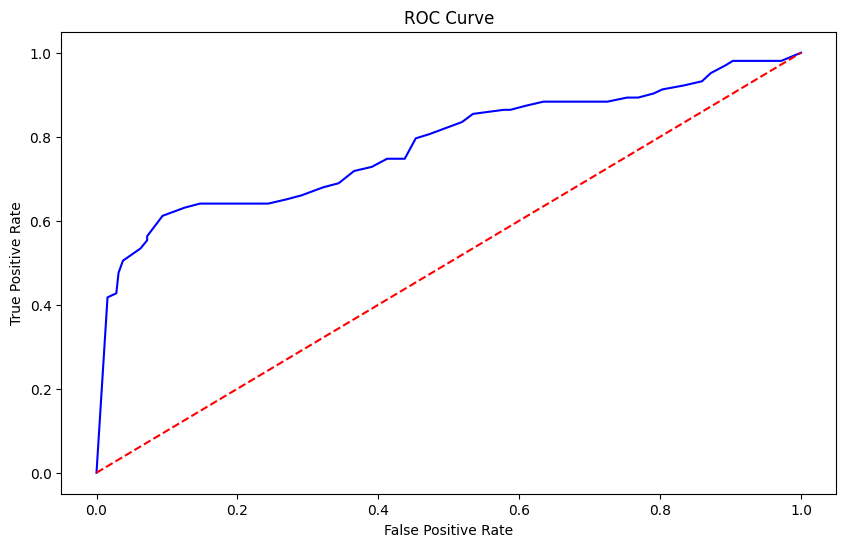

AUC: 0.7785042475728154


In [21]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate sensitivity (recall) and specificity
cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# ROC curve and AUC
probabilities = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probabilities)
print("AUC:", auc)